In [95]:
%matplotlib inline
import json, requests, random
import numpy as np
import matplotlib as plt
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib
import cv2
# from tifffile import imsave

In [ ]:
!pip install tifffile

In [8]:

with open('/Users/joelsimon/Projects/Antimander/repo/view/data/WI/state_4.json', 'r') as file:
    state_data = json.load(file)

In [93]:
len(state_data['shapes'])

6516

In [141]:
r = 1024*2
img = np.zeros((r, r, 3), dtype='uint8')
x0, y0, x1, y1 = state_data['bbox']
scale = min(r/(x1-x0), r/(y1-y0))
bottom = np.array([x0, y0])

for idx, multipoly in enumerate(state_data['shapes']):
    for shape in multipoly:
        array = np.array(shape[:-1])
        array = (array - bottom) * scale
        array = array.astype('i')
        array = array.reshape((-1,1,2))
        j = idx + 1
        cv2.fillPoly(img, [array], ((j >> 16)&255, (j >> 8)&255, j&255))
#     if idx > 255:
#         print(((j >> 16)&255, (j >> 8)&255, j&255))
print(idx)
img = img[::-1]

6515


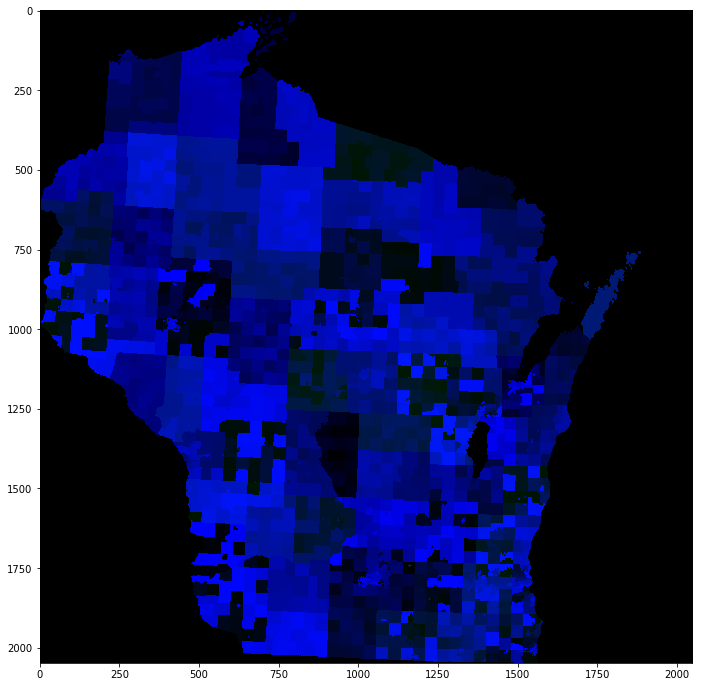

In [138]:
plt.figure(figsize=(12,12))
# plt.imshow(img, cmap='gray')
plt.imshow(img)

In [133]:
np.unique(img).shape

(256,)

In [139]:
cv2.imwrite('test.png', img[:, :, ::-1])

True

In [145]:
with open('voters_population.json', 'w') as file:
    json.dump({ 'voters': state_data['voters'], 'population':  state_data['population'] }, file)

In [144]:
help(json.dump)

Help on function dump in module json:

dump(obj, fp, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, cls=None, indent=None, separators=None, default=None, sort_keys=False, **kw)
    Serialize ``obj`` as a JSON formatted stream to ``fp`` (a
    ``.write()``-supporting file-like object).
    
    If ``skipkeys`` is true then ``dict`` keys that are not basic types
    (``str``, ``int``, ``float``, ``bool``, ``None``) will be skipped
    instead of raising a ``TypeError``.
    
    If ``ensure_ascii`` is false, then the strings written to ``fp`` can
    contain non-ASCII characters if they appear in strings contained in
    ``obj``. Otherwise, all such characters are escaped in JSON strings.
    
    If ``check_circular`` is false, then the circular reference check
    for container types will be skipped and a circular reference will
    result in an ``OverflowError`` (or worse).
    
    If ``allow_nan`` is false, then it will be a ``ValueError`` to
    serialize o